In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"adarshxdatascientist","key":"f827f92b82622985a4fa4790e7c094cd"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone

Dataset URL: https://www.kaggle.com/datasets/nazmul0087/ct-kidney-dataset-normal-cyst-tumor-and-stone
License(s): copyright-authors
100% 1.51G/1.52G [00:13<00:00, 114MB/s]
100% 1.52G/1.52G [00:13<00:00, 121MB/s]


In [ ]:
!unzip ct-kidney-dataset-normal-cyst-tumor-and-stone.zip

Streaming output truncated to the last 5000 lines.
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4363).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4364).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4365).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4366).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4367).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4368).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal/Normal- (4369).jpg  
  inflating: CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-N

In [ ]:
import os
from PIL import Image, ImageFilter
from tqdm import tqdm
from torchvision import transforms
import matplotlib.pyplot as plt

In [ ]:
resize_transform = transforms.Compose([
    transforms.Resize((224, 224)),
])

In [ ]:
def process_and_save_images(input_dir, output_dir):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    image_files = [f for f in os.listdir(input_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    for filename in tqdm(image_files, desc=f"Processing images in {input_dir}"):
        img_path = os.path.join(input_dir, filename)
        try:

            img = Image.open(img_path)


            img_resized = resize_transform(img)


            img_blurred = img_resized.filter(ImageFilter.MedianFilter(size=3))


            img_sharpened = img_blurred.filter(ImageFilter.SHARPEN)


            img_rgb = img_sharpened.convert('RGB')


            img_rgb.save(os.path.join(output_dir, filename))

        except Exception as e:
            print(f"Error processing image {img_path}: {e}")


In [ ]:
stone_dir = '/content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Stone'
normal_dir = '/content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal'

In [ ]:
output_stone_dir = '/content/Stone_processed'
output_normal_dir = '/content/Normal_processed'

In [ ]:
process_and_save_images(stone_dir, output_stone_dir)
process_and_save_images(normal_dir, output_normal_dir)

Processing images in /content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Stone: 100%|██████████| 1377/1377 [00:26<00:00, 52.08it/s]
Processing images in /content/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal: 100%|██████████| 5077/5077 [01:30<00:00, 56.08it/s]


In [ ]:
augmentation_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=30),
    transforms.ColorJitter(brightness=0.2, contrast=0.2)
])

In [ ]:
def augment_and_save_images(input_dir, output_dir, augment_times=1):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    image_files = [f for f in os.listdir(input_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # Initial count of images
    initial_count = len(image_files)

    for filename in tqdm(image_files, desc=f"Augmenting images in {input_dir}"):
        img_path = os.path.join(input_dir, filename)
        try:
            img = Image.open(img_path)
            for i in range(augment_times):

                augmented_img = augmentation_transforms(img)


                file_root, file_ext = os.path.splitext(filename)
                aug_filename = f"{file_root}_aug{i+1}{file_ext}"


                augmented_img.save(os.path.join(output_dir, aug_filename))
        except Exception as e:
            print(f"Error augmenting image {img_path}: {e}")


    final_image_files = [f for f in os.listdir(output_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    final_count = len(final_image_files)


    print(f"Initial number of images: {initial_count}")
    print(f"Number of images after augmentation: {final_count}")

In [ ]:
output_stone_dir = '/content/Stone_processed'
output_stone_dir_aug = '/content/Stone_processed_new'


augment_and_save_images(output_stone_dir, output_stone_dir_aug, augment_times=3)

Augmenting images in /content/Stone_processed: 100%|██████████| 1377/1377 [00:10<00:00, 128.03it/s]

Initial number of images: 1377
Number of images after augmentation: 4131


In [ ]:
original_dir = '/content/Stone_processed'
augmented_dir = '/content/Stone_processed_new'

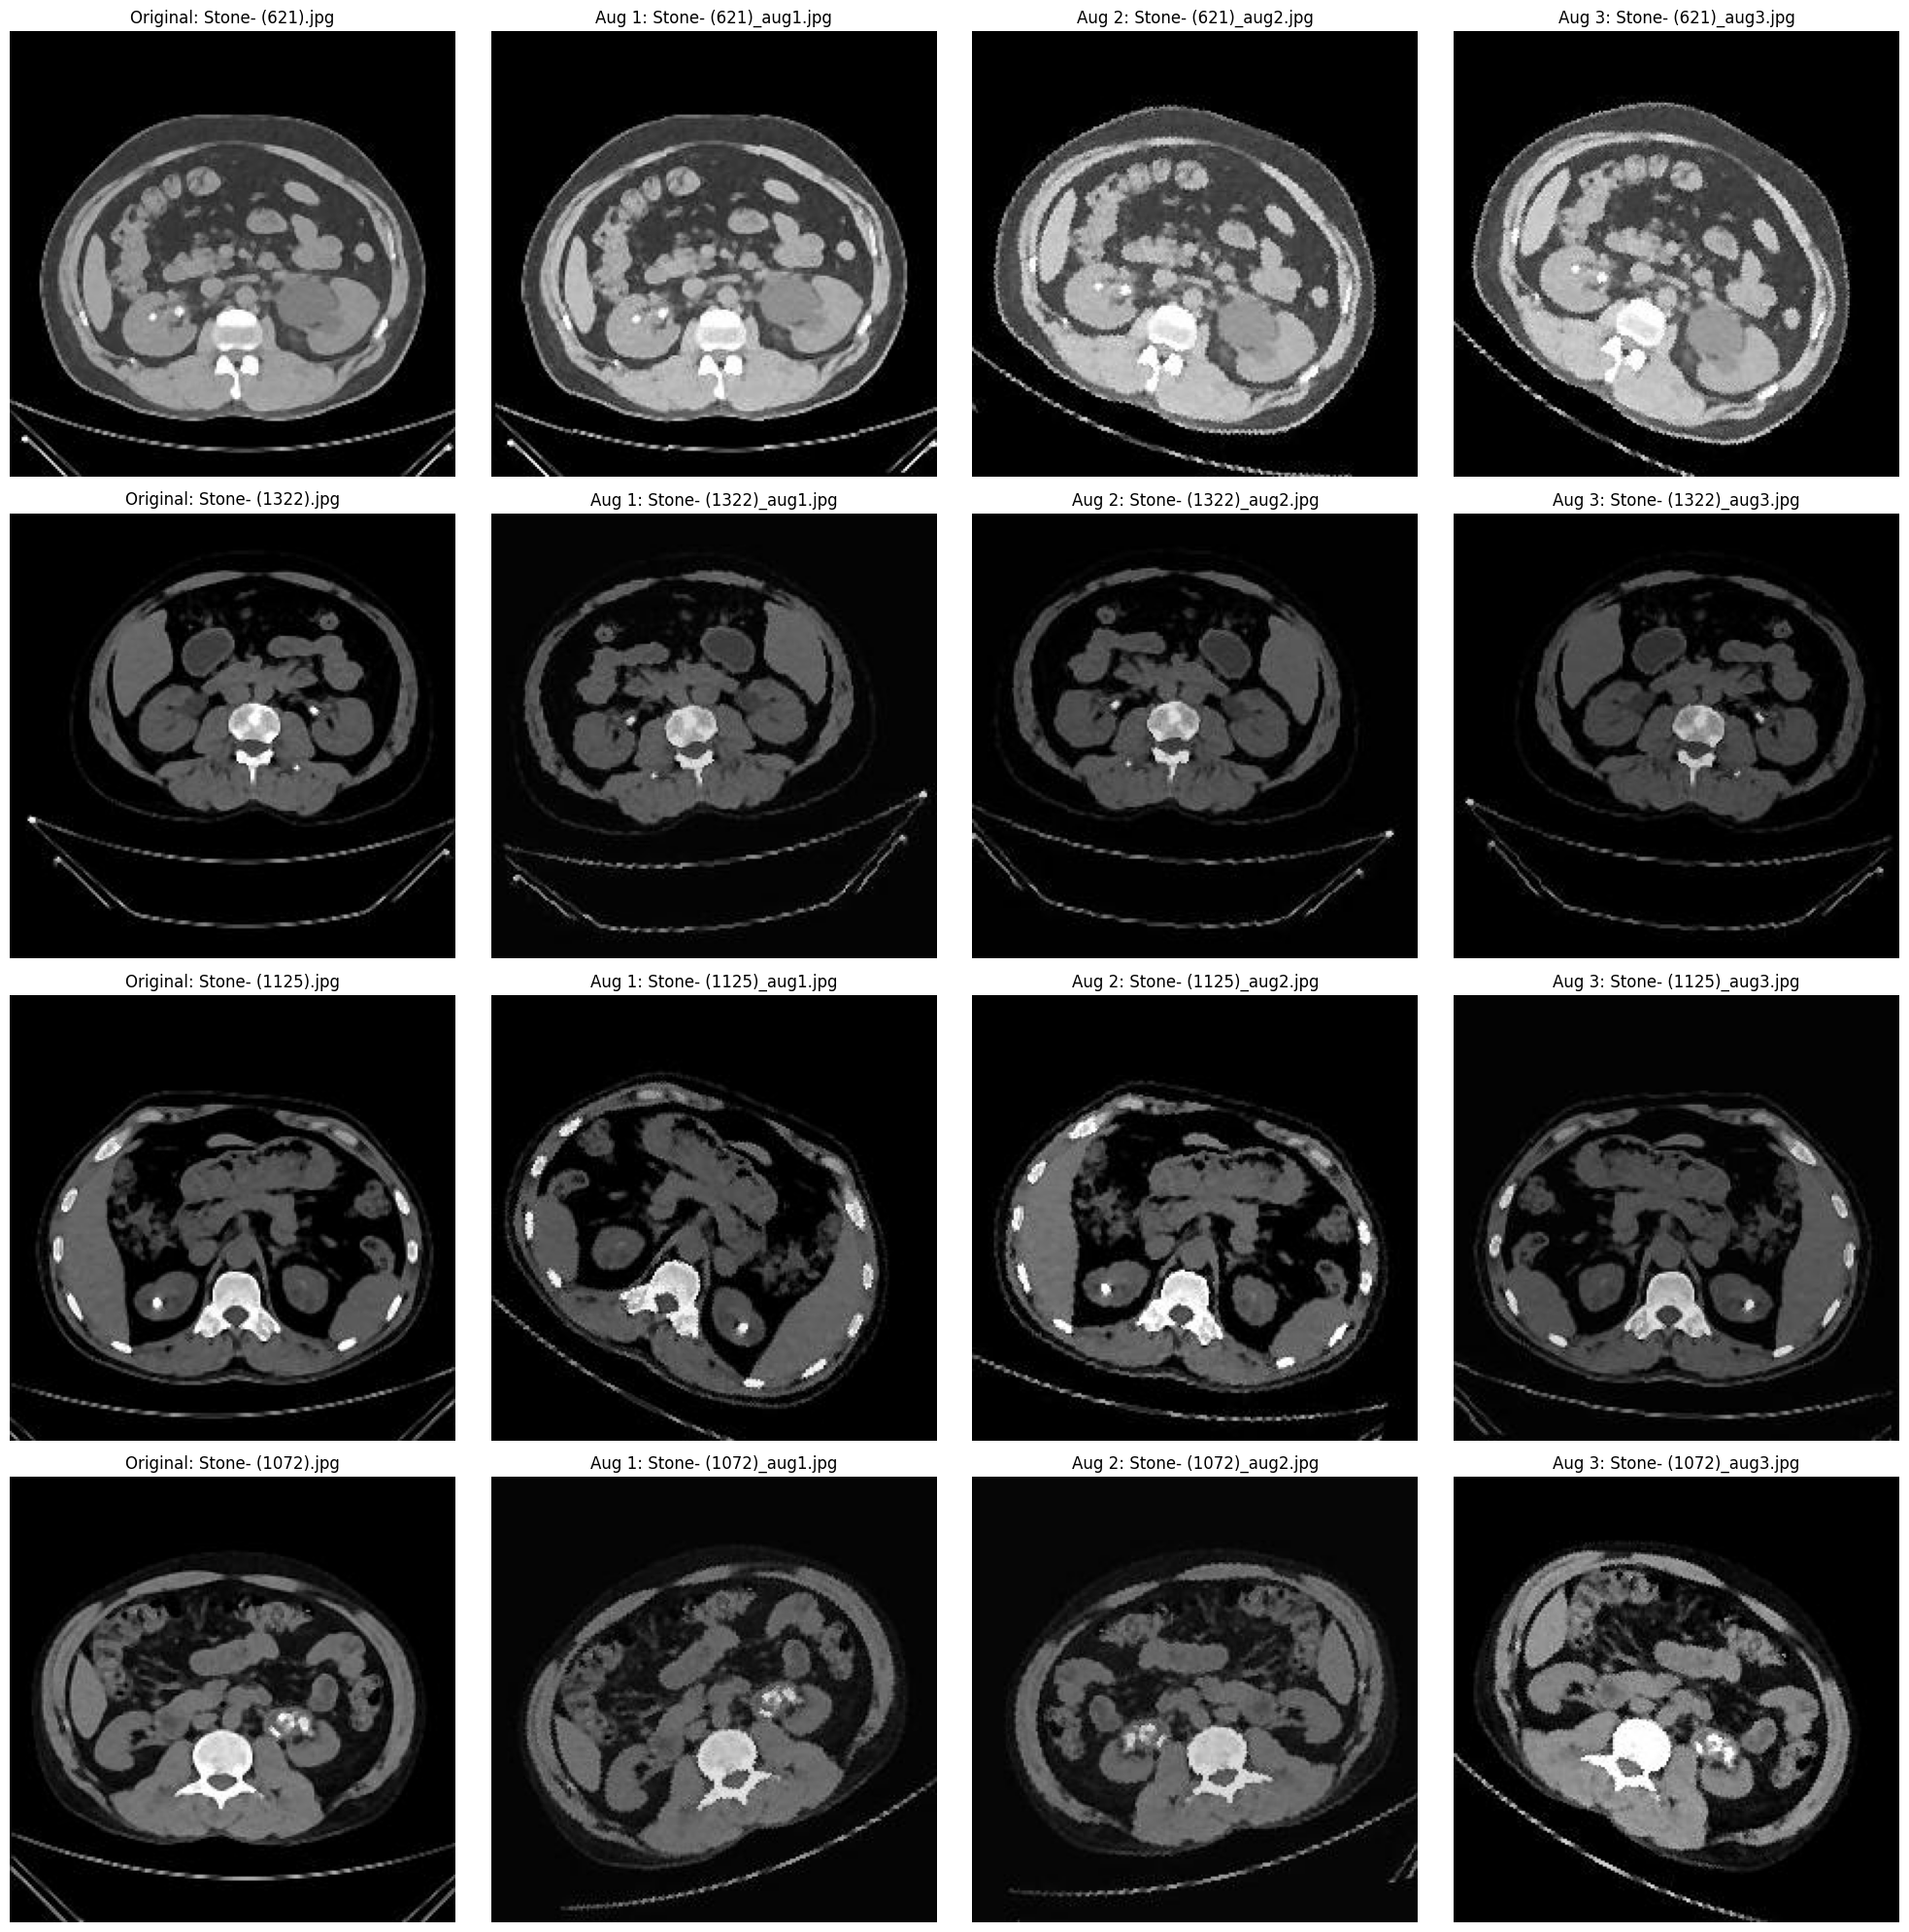

In [ ]:
original_images = [f for f in os.listdir(original_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
augmented_images = [f for f in os.listdir(augmented_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]


num_originals_to_plot = 4
augment_per_original = 3

plt.figure(figsize=(5 * (augment_per_original + 1), 5 * num_originals_to_plot))

for i in range(num_originals_to_plot):
    if i >= len(original_images):
        break

    original_filename = original_images[i]
    original_path = os.path.join(original_dir, original_filename)

    try:
        original_img = Image.open(original_path).convert('RGB')
    except Exception as e:
        print(f"Error loading original image {original_path}: {e}")
        continue


    plt.subplot(num_originals_to_plot, augment_per_original + 1, i * (augment_per_original + 1) + 1)
    plt.imshow(original_img)
    plt.axis('off')
    plt.title(f"Original: {original_filename}")


    base_name = os.path.splitext(original_filename)[0]
    for j in range(augment_per_original):
        aug_filename = f"{base_name}_aug{j+1}{os.path.splitext(original_filename)[1]}"
        aug_path = os.path.join(augmented_dir, aug_filename)

        try:
            aug_img = Image.open(aug_path).convert('RGB')
        except Exception as e:
            print(f"Error loading augmented image {aug_path}: {e}")
            # Placeholder if augmented image is missing
            plt.subplot(num_originals_to_plot, augment_per_original + 1, i * (augment_per_original + 1) + 2 + j)
            plt.text(0.5, 0.5, 'Image\nNot Found', horizontalalignment='center', verticalalignment='center')
            plt.axis('off')
            plt.title(f"Aug {j+1}: N/A")
            continue

        plt.subplot(num_originals_to_plot, augment_per_original + 1, i * (augment_per_original + 1) + 2 + j)
        plt.imshow(aug_img)
        plt.axis('off')
        plt.title(f"Aug {j+1}: {aug_filename}")

plt.tight_layout()
plt.show()

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/My\ Drive/kidneyStone

CT_Kidney_Data	Normal_processed  Stone_processed  Stone_processed_new


In [ ]:
processed_stone_dir = '/content/drive/My Drive/kidneyStone/Stone_processed'
processed_normal_dir = '/content/drive/My Drive/kidneyStone/Normal_processed'

base_dir = '/content/drive/My Drive/kidneyStone/CT_Kidney_Data'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
for split_dir in [train_dir, val_dir, test_dir]:
    for class_name in ['Stone', 'Normal']:
        os.makedirs(os.path.join(split_dir, class_name), exist_ok=True)


def split_data(source_dir, class_name, train_dir, val_dir, test_dir, split_ratio=(0.7, 0.15, 0.15)):
    images = [f for f in os.listdir(source_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]


    labels = [0 if class_name == 'Stone' else 1] * len(images)


    train_val, test = train_test_split(images, test_size=split_ratio[2], random_state=42, stratify=labels)


    train, val = train_test_split(train_val, test_size=split_ratio[1]/(split_ratio[0]+split_ratio[1]), random_state=42, stratify=[0 if class_name == 'Stone' else 1] * len(train_val))


    for img in train:
        shutil.copy(os.path.join(source_dir, img), os.path.join(train_dir, class_name, img))
    for img in val:
        shutil.copy(os.path.join(source_dir, img), os.path.join(val_dir, class_name, img))
    for img in test:
        shutil.copy(os.path.join(source_dir, img), os.path.join(test_dir, class_name, img))


split_data(processed_stone_dir, 'Stone', train_dir, val_dir, test_dir)


split_data(processed_normal_dir, 'Normal', train_dir, val_dir, test_dir)

print("Dataset split into training, validation, and testing sets successfully.")

KeyboardInterrupt: 

In [ ]:
import os

In [ ]:
# Before Augmentation

train_dir = '/content/drive/My Drive/kidneyStone/CT_Kidney_Data/train'
val_dir = '/content/drive/My Drive/kidneyStone/CT_Kidney_Data/val'
test_dir = '/content/drive/My Drive/kidneyStone/CT_Kidney_Data/test'


def count_images(directory, class_name):
    class_dir = os.path.join(directory, class_name)
    return len([f for f in os.listdir(class_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])


stone_train_count = count_images(train_dir, 'Stone')
stone_val_count = count_images(val_dir, 'Stone')
stone_test_count = count_images(test_dir, 'Stone')

normal_train_count = count_images(train_dir, 'Normal')
normal_val_count = count_images(val_dir, 'Normal')
normal_test_count = count_images(test_dir, 'Normal')

print(f"Stone images: Train = {stone_train_count}, Validation = {stone_val_count}, Test = {stone_test_count}")
print(f"Normal images: Train = {normal_train_count}, Validation = {normal_val_count}, Test = {normal_test_count}")


total_train_count = stone_train_count + normal_train_count
total_val_count = stone_val_count + normal_val_count
total_test_count = stone_test_count + normal_test_count

print(f"Total images: Train = {total_train_count}, Validation = {total_val_count}, Test = {total_test_count}")

Stone images: Train = 3164, Validation = 377, Test = 377
Normal images: Train = 3616, Validation = 762, Test = 762
Total images: Train = 6780, Validation = 1139, Test = 1139


In [ ]:
output_stone_dir = '/content/drive/My Drive/kidneyStone/CT_Kidney_Data/train/Stone'
output_stone_dir_aug = '/content/drive/My Drive/kidneyStone/CT_Kidney_Data/train/Stone'

augment_and_save_images(output_stone_dir, output_stone_dir_aug, augment_times=2)

NameError: name 'augment_and_save_images' is not defined

In [ ]:
import os

In [ ]:
train_dir = '/content/drive/My Drive/kidneyStone/CT_Kidney_Data/train'


val_dir = '/content/drive/My Drive/kidneyStone/CT_Kidney_Data/val'
test_dir = '/content/drive/My Drive/kidneyStone/CT_Kidney_Data/test'


def count_images(directory, class_name):
    class_dir = os.path.join(directory, class_name)
    return len([f for f in os.listdir(class_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])


stone_train_count = count_images(train_dir, 'Stone')
stone_val_count = count_images(val_dir, 'Stone')
stone_test_count = count_images(test_dir, 'Stone')

normal_train_count = count_images(train_dir, 'Normal')
normal_val_count = count_images(val_dir, 'Normal')
normal_test_count = count_images(test_dir, 'Normal')

print(f"Stone images: Train = {stone_train_count}, Validation = {stone_val_count}, Test = {stone_test_count}")
print(f"Normal images: Train = {normal_train_count}, Validation = {normal_val_count}, Test = {normal_test_count}")


total_train_count = stone_train_count + normal_train_count
total_val_count = stone_val_count + normal_val_count
total_test_count = stone_test_count + normal_test_count

print(f"Total images: Train = {total_train_count}, Validation = {total_val_count}, Test = {total_test_count}")

Stone images: Train = 3164, Validation = 377, Test = 377
Normal images: Train = 3616, Validation = 762, Test = 762
Total images: Train = 6780, Validation = 1139, Test = 1139


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
source_folder = ['/content/Stone_processed','/content/Stone_processed_new', '/content/Normal_processed','CT_Kidney_Data']
destination_folder = '/content/drive/My Drive/kidneyStone'
for folders in source_folder:
  shutil.move(folders, destination_folder)


In [ ]:
import os
from collections import Counter

data_dir = '/content/drive/My Drive/kidneyStone/CT_Kidney_Data'

# Count the number of images in each class
def count_images_per_class(data_dir):
    class_counts = {}
    for class_dir in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_dir)
        if os.path.isdir(class_path):
            image_count = len(os.listdir(class_path))
            class_counts[class_dir] = image_count
    return class_counts

# Print the number of images per class
class_counts = count_images_per_class(os.path.join(data_dir, 'train'))
print(f"Images per class: {class_counts}")


Images per class: {'Normal': 3616, 'Stone': 3164}


In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [ ]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomRotation(30),  # Randomly rotate the image by up to 30 degrees
        transforms.RandomHorizontalFlip(),  # Randomly flip the image horizontally
        transforms.Resize((224, 224)),  # Resize to 224x224
        transforms.ToTensor(),  # Convert image to tensor
        transforms.Normalize([0.485, 0.456, 0.406],  # Normalization mean (ImageNet)
                             [0.229, 0.224, 0.225])  # Normalization std (ImageNet)
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),  # No augmentation for validation/test
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize((224, 224)),  # No augmentation for validation/test
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
}

In [ ]:
image_datasets = {
    'train': datasets.ImageFolder(train_dir, transform=data_transforms['train']),
    'val': datasets.ImageFolder(val_dir, transform=data_transforms['val']),
    'test': datasets.ImageFolder(test_dir, transform=data_transforms['test']),
}

In [ ]:
from PIL import Image
from torchvision import datasets
import os

In [ ]:
def pil_loader(path):
    try:
        with open(path, 'rb') as f:
            img = Image.open(f)
            return img.convert('RGB')
    except Image.UnidentifiedImageError:
        print(f"Skipping corrupted image: {path}")
        return None

In [ ]:
def validate_dataset(image_folder):
    for path, _ in image_folder.samples:
        img = pil_loader(path)
        if img is None:
            print(f"Corrupted file: {path}")

validate_dataset(image_datasets['train'])
validate_dataset(image_datasets['val'])

Skipping corrupted image: /content/drive/My Drive/kidneyStone/CT_Kidney_Data/train/Stone/Stone- (555).jpg
Corrupted file: /content/drive/My Drive/kidneyStone/CT_Kidney_Data/train/Stone/Stone- (555).jpg


In [ ]:
def remove_corrupted_images(image_folder):
    corrupted_files = []
    for path, _ in image_folder.samples:
        img = pil_loader(path)
        if img is None:
            corrupted_files.append(path)

    for file in corrupted_files:
        print(f"Removing corrupted file: {file}")
        os.remove(file)

remove_corrupted_images(image_datasets['train'])
remove_corrupted_images(image_datasets['val'])

Skipping corrupted image: /content/drive/My Drive/kidneyStone/CT_Kidney_Data/train/Normal/Normal- (2671).jpg
Removing corrupted file: /content/drive/My Drive/kidneyStone/CT_Kidney_Data/train/Normal/Normal- (2671).jpg


In [ ]:
batch_size = 32

data_loaders = {
    'train': DataLoader(image_datasets['train'], batch_size=batch_size, shuffle=True, num_workers=4),
    'val': DataLoader(image_datasets['val'], batch_size=batch_size, shuffle=False, num_workers=4),
    'test': DataLoader(image_datasets['test'], batch_size=batch_size, shuffle=False, num_workers=4),
}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val', 'test']}
class_names = image_datasets['train'].classes
print(f"Classes: {class_names}")
print(f"Dataset sizes: {dataset_sizes}")

Classes: ['Normal', 'Stone']
Dataset sizes: {'train': 6781, 'val': 1139, 'test': 1139}


In [ ]:
import torch
import torch.nn as nn
from torchvision import models

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

model = models.resnet101(pretrained=True)

for param in model.parameters():
  param.requires_grad = False

for name, child in model.named_children():
  if name in ['layer', 'fc']:
    for param in child.parameters():
      param.requires_grad = True

num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2)

for param in model.fc.parameters():
  param.requires_grad = True

model = model.to(device)

cuda


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:01<00:00, 112MB/s]


In [ ]:
!pip install torchsummary

In [ ]:
from torchsummary import summary


model = model.to(device)


summary(model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()


params_to_update = [param for param in model.parameters() if param.requires_grad]


optimizer = optim.Adam(params_to_update, lr=1e-4, weight_decay=1e-5)


scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)


print(optimizer)
print(scheduler)

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    initial_lr: 0.0001
    lr: 0.0001
    maximize: False
    weight_decay: 1e-05
)


In [ ]:
import copy

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': []}

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)


        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0


            for inputs, labels in tqdm(data_loaders[phase], desc=f"{phase.capitalize()}"):
                inputs = inputs.to(device)
                labels = labels.to(device)


                optimizer.zero_grad()


                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)


                    if phase == 'train':
                        loss.backward()
                        optimizer.step()


                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            history[f'{phase}_loss'].append(epoch_loss)
            history[f'{phase}_acc'].append(epoch_acc.item())

            print(f'{phase.capitalize()} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')


            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    print(f'Best val Acc: {best_acc:.4f}')


    model.load_state_dict(best_model_wts)
    return model, history

In [ ]:
num_epochs = 10
model, history = train_model(model, criterion, optimizer, scheduler, num_epochs=num_epochs)

Epoch 1/10
----------


Train: 100%|██████████| 202/202 [00:40<00:00,  4.97it/s]


Train Loss: 0.5527 Acc: 0.7543


Val: 100%|██████████| 31/31 [00:05<00:00,  5.80it/s]


Val Loss: 0.4012 Acc: 0.8328

Epoch 2/10
----------


Train: 100%|██████████| 202/202 [00:36<00:00,  5.56it/s]


Train Loss: 0.4244 Acc: 0.8410


Val: 100%|██████████| 31/31 [00:05<00:00,  5.37it/s]


Val Loss: 0.3552 Acc: 0.8297

Epoch 3/10
----------


Train: 100%|██████████| 202/202 [00:36<00:00,  5.59it/s]


Train Loss: 0.3712 Acc: 0.8592


Val: 100%|██████████| 31/31 [00:06<00:00,  5.08it/s]


Val Loss: 0.3249 Acc: 0.8627

Epoch 4/10
----------


Train: 100%|██████████| 202/202 [00:36<00:00,  5.54it/s]


Train Loss: 0.3396 Acc: 0.8753


Val: 100%|██████████| 31/31 [00:05<00:00,  5.80it/s]


Val Loss: 0.3145 Acc: 0.8648

Epoch 5/10
----------


Train: 100%|██████████| 202/202 [00:36<00:00,  5.58it/s]


Train Loss: 0.3216 Acc: 0.8727


Val: 100%|██████████| 31/31 [00:05<00:00,  5.49it/s]


Val Loss: 0.3224 Acc: 0.8566

Epoch 6/10
----------


Train: 100%|██████████| 202/202 [00:36<00:00,  5.50it/s]


Train Loss: 0.3011 Acc: 0.8854


Val: 100%|██████████| 31/31 [00:05<00:00,  5.71it/s]


Val Loss: 0.2974 Acc: 0.8834

Epoch 7/10
----------


Train: 100%|██████████| 202/202 [00:36<00:00,  5.52it/s]


Train Loss: 0.2956 Acc: 0.8856


Val: 100%|██████████| 31/31 [00:05<00:00,  5.30it/s]


Val Loss: 0.3042 Acc: 0.8772

Epoch 8/10
----------


Train: 100%|██████████| 202/202 [00:37<00:00,  5.43it/s]


Train Loss: 0.2841 Acc: 0.8918


Val: 100%|██████████| 31/31 [00:05<00:00,  5.67it/s]


Val Loss: 0.2945 Acc: 0.8865

Epoch 9/10
----------


Train: 100%|██████████| 202/202 [00:36<00:00,  5.53it/s]


Train Loss: 0.2853 Acc: 0.8906


Val: 100%|██████████| 31/31 [00:05<00:00,  5.32it/s]


Val Loss: 0.2901 Acc: 0.8875

Epoch 10/10
----------


Train: 100%|██████████| 202/202 [00:36<00:00,  5.52it/s]


Train Loss: 0.2862 Acc: 0.8896


Val: 100%|██████████| 31/31 [00:05<00:00,  5.67it/s]

Val Loss: 0.2882 Acc: 0.8875

Best val Acc: 0.8875


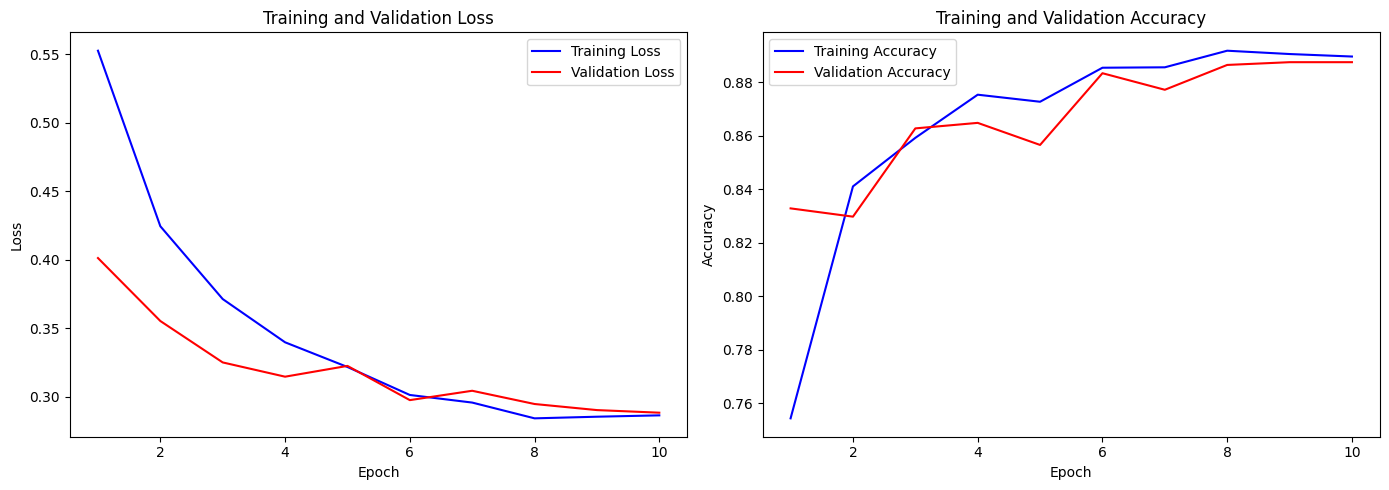

In [ ]:
epochs = range(1, num_epochs + 1)

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, history['train_loss'], 'b-', label='Training Loss')
plt.plot(epochs, history['val_loss'], 'r-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(epochs, history['train_acc'], 'b-', label='Training Accuracy')
plt.plot(epochs, history['val_acc'], 'r-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import  numpy as np

Testing: 100%|██████████| 31/31 [00:07<00:00,  4.05it/s]


Test Accuracy: 0.8566
Classification Report:
              precision    recall  f1-score   support

      Normal       0.85      0.99      0.92       762
       Stone       0.91      0.36      0.52       207

    accuracy                           0.86       969
   macro avg       0.88      0.68      0.72       969
weighted avg       0.86      0.86      0.83       969



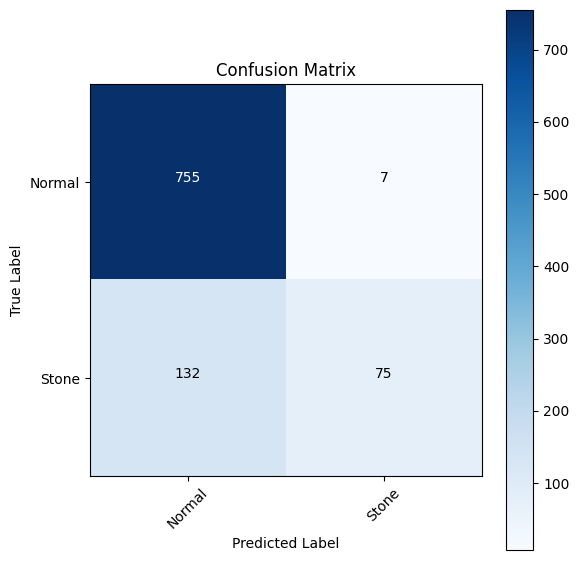

In [ ]:
def evaluate_model(model, data_loader, class_names):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in tqdm(data_loader, desc="Testing"):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())


    acc = accuracy_score(all_labels, all_preds)
    print(f'Test Accuracy: {acc:.4f}')


    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))


    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(6,6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()


evaluate_model(model, data_loaders['test'], class_names)

In [ ]:
model_save_path = '/content/best_resnet101_model.pth'
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to /content/best_resnet101_model.pth


In [ ]:
import torch.nn.functional as F


def extract_features_resnet(model, data_loader):
    model.eval()
    features = []
    labels_list = []

    # Define a feature extractor that includes layers up to the avgpool
    feature_extractor = nn.Sequential(
        *list(model.children())[:-1],  # Extract up to the avgpool layer
        nn.AdaptiveAvgPool2d((1, 1))  # Optional, in case adaptive pooling is needed
    )

    feature_extractor = feature_extractor.to(device)

    with torch.no_grad():
        for inputs, labels in tqdm(data_loader, desc="Extracting Features"):
            inputs = inputs.to(device)
            outputs = feature_extractor(inputs)
            outputs = outputs.view(outputs.size(0), -1)
            features.append(outputs.cpu().numpy())
            labels_list.extend(labels.cpu().numpy())

    features = np.concatenate(features, axis=0)
    labels_list = np.array(labels_list)

    return features, labels_list


test_features, test_labels = extract_features_resnet(model, data_loaders['test'])

print(f"Extracted features shape: {test_features.shape}")

Extracting Features:   0%|          | 0/31 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Extracting Features: 100%|██████████| 31/31 [00:06<00:00,  4.98it/s]

Extracted features shape: (969, 2048)


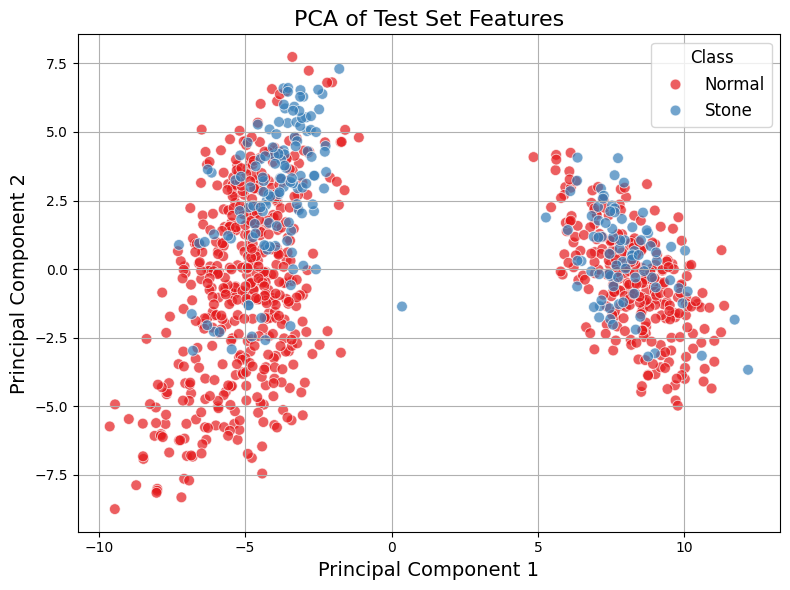

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import pandas as pd


pca = PCA(n_components=2, random_state=42)
principal_components = pca.fit_transform(test_features)


df_pca = pd.DataFrame({
    'PC1': principal_components[:, 0],
    'PC2': principal_components[:, 1],
    'Label': [class_names[label] for label in test_labels]
})


plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Label', palette='Set1', s=60, alpha=0.7)
plt.title('PCA of Test Set Features', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(title='Class', fontsize=12, title_fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
!pip install torch torchvision torchaudio

In [ ]:
import torch.nn.functional as F
from torchvision.transforms import ToPILImage
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.model.eval()
        self.target_layer = target_layer

        self.gradients = None
        self.activations = None

        self.target_layer.register_forward_hook(self.save_activation)
        self.target_layer.register_backward_hook(self.save_gradient)

    def save_activation(self, module, input, output):
        self.activations = output.detach()

    def save_gradient(self, module, grad_input, grad_output):
        self.gradients = grad_output[0].detach()

    def generate_cam(self, input_image, class_idx=None):
        # if self.cuda:
        #   input_image = input_image.cuda()

    # Zero out gradients
        self.model.zero_grad()

    # Forward pass
        output = self.model(input_image)

        if class_idx is None:
          _, class_idx = torch.max(output, dim=1)

    # Set requires_grad to True for input_image
        input_image.requires_grad = True

    # Backward pass
        target = output[range(len(class_idx)), class_idx]
        target.backward(torch.ones_like(target))

    # Get gradients and activations
        self.gradients = self.activations.grad
        if self.gradients is None: # Check if gradients are None
            raise ValueError("Gradients are None. Check if requires_grad is set to True for the input image.")
        self.activations = self.activations

    # Calculate weights and CAM
        weights = torch.mean(self.gradients, dim=(2, 3), keepdim=True)
        cam = torch.sum(weights * self.activations, dim=1)
        cam = F.relu(cam)

        return cam

In [ ]:
def overlay_cam_on_image(img, cam, alpha=0.5, colormap='jet'):
    cam = Image.fromarray((cam * 255).astype(np.uint8)).resize((img.size[1], img.size[0]), Image.ANTIALIAS)
    cam = np.array(cam)
    heatmap = plt.get_cmap(colormap)(cam)
    heatmap = Image.fromarray((heatmap[:, :, :3] * 255).astype(np.uint8))
    overlay = Image.blend(img, heatmap, alpha)
    return overlay

target_layer = model.layer4
grad_cam = GradCAM(model, target_layer)

In [ ]:
def select_random_images(dataset, class_names, images_per_class=2):
    class_to_indices = {class_name: [] for class_name in class_names}
    for idx, (_, label) in enumerate(dataset.samples):
        class_name = class_names[label]
        class_to_indices[class_name].append(idx)

    selected_indices = []
    for class_name in class_names:
        indices = class_to_indices[class_name]
        if len(indices) < images_per_class:
            raise ValueError(f"Not enough images to select from class {class_name}")
        selected = random.sample(indices, images_per_class)
        selected_indices.extend(selected)

    return selected_indices

In [ ]:
selected_indices = select_random_images(image_datasets['test'], class_names, images_per_class=2)

In [ ]:
def get_image_label(dataset, index):
    path, label = dataset.samples[index]
    image = Image.open(path).convert('RGB')
    image_transformed = data_transforms['test'](image).unsqueeze(0)
    return image_transformed, label, image

In [ ]:
for idx in selected_indices:
    img_tensor, label, img_pil = get_image_label(image_datasets['test'], idx)


    cam = grad_cam.generate_cam(img_tensor.to(device))


    img = img_tensor.cpu().squeeze().permute(1, 2, 0).numpy()
    img = np.clip(img * np.array([0.229, 0.224, 0.225]) +
                  np.array([0.485, 0.456, 0.406]), 0, 1)
    img_pil_processed = Image.fromarray((img * 255).astype(np.uint8))


    cam_image = overlay_cam_on_image(img_pil_processed, cam[0])


    plt.figure(figsize=(12, 6))


    plt.subplot(1, 2, 1)
    plt.imshow(img_pil_processed)
    plt.axis('off')
    plt.title(f"Original: {class_names[label]}", fontsize=16, loc='left')


    plt.subplot(1, 2, 2)
    plt.imshow(cam_image)
    plt.axis('off')
    plt.title("Grad-CAM", fontsize=16, loc='left')

    plt.tight_layout()
    plt.show()

Activations captured


ValueError: Gradients are None. Check if requires_grad is set to True for the input image.

In [ ]:
import torch.nn.functional as F
from torchvision.transforms import ToPILImage
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2


class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.model.eval()
        self.target_layer = target_layer

        self.gradients = None
        self.activations = None

        def save_activation(module, input, output):
            self.activations = output

        def save_gradient(module, grad_input, grad_output):
            self.gradients = grad_output[0]

        self.target_layer.register_forward_hook(save_activation)
        self.target_layer.register_backward_hook(save_gradient)

    def generate_cam(self, input_image, class_idx=None):
        output = self.model(input_image)

        if class_idx is None:
            class_idx = torch.argmax(output, dim=1)
        self.model.zero_grad()
        one_hot_output = torch.zeros_like(output)
        one_hot_output[0][class_idx] = 1
        output.backward(gradient=one_hot_output, retain_graph=True)

        gradients = self.gradients.cpu().data.numpy()
        activations = self.activations.cpu().data.numpy()[0, :]

        weights = np.mean(gradients, axis=(2, 3))[0, :]
        cam = np.zeros(activations.shape[1:], dtype=np.float32)

        for i, w in enumerate(weights):
            cam += w * activations[i, :, :]

        cam = np.maximum(cam, 0)
        cam = cv2.resize(cam, input_image.shape[2:])
        cam = cam - np.min(cam)
        cam = cam / np.max(cam)
        return cam
def overlay_cam_on_image(img, cam, alpha=0.5, colormap='jet'):
    cam = Image.fromarray((cam * 255).astype(np.uint8)).resize((img.size[1], img.size[0]), Image.ANTIALIAS)
    cam = np.array(cam)
    heatmap = plt.get_cmap(colormap)(cam)
    heatmap = Image.fromarray((heatmap[:, :, :3] * 255).astype(np.uint8))
    overlay = Image.blend(img, heatmap, alpha)
    return overlay

target_layer = model.layer4
grad_cam = GradCAM(model, target_layer)
def select_random_images(dataset, class_names, images_per_class=2):
    class_to_indices = {class_name: [] for class_name in class_names}
    for idx, (_, label) in enumerate(dataset.samples):
        class_name = class_names[label]
        class_to_indices[class_name].append(idx)

    selected_indices = []
    for class_name in class_names:
        indices = class_to_indices[class_name]
        if len(indices) < images_per_class:
            raise ValueError(f"Not enough images to select from class {class_name}")
        selected = random.sample(indices, images_per_class)
        selected_indices.extend(selected)

    return selected_indices


selected_indices = select_random_images(image_datasets['test'], class_names, images_per_class=2)


def get_image_label(dataset, index):
    path, label = dataset.samples[index]
    image = Image.open(path).convert('RGB')
    image_transformed = data_transforms['test'](image).unsqueeze(0)
    return image_transformed, label, image


for idx in selected_indices:
    img_tensor, label, img_pil = get_image_label(image_datasets['test'], idx)


    cam = grad_cam.generate_cam(img_tensor.to(device))


    img = img_tensor.cpu().squeeze().permute(1, 2, 0).numpy()
    img = np.clip(img * np.array([0.229, 0.224, 0.225]) +
                  np.array([0.485, 0.456, 0.406]), 0, 1)
    img_pil_processed = Image.fromarray((img * 255).astype(np.uint8))


    cam_image = overlay_cam_on_image(img_pil_processed, cam[0])


    plt.figure(figsize=(12, 6))


    plt.subplot(1, 2, 1)
    plt.imshow(img_pil_processed)
    plt.axis('off')
    plt.title(f"Original: {class_names[label]}", fontsize=16, loc='left')


    plt.subplot(1, 2, 2)
    plt.imshow(cam_image)
    plt.axis('off')
    plt.title("Grad-CAM", fontsize=16, loc='left')

    plt.tight_layout()
    plt.show()

Activations captured


AttributeError: 'NoneType' object has no attribute 'cpu'

In [ ]:
!pip install opencv-python

In [ ]:
import torch
import torch.nn as nn
from torchvision import models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

# Load pretrained ResNet101
model = models.resnet101(pretrained=True)

# Freeze earlier layers, only fine-tune the final layer
for param in model.parameters():
  param.requires_grad = False

# Unfreeze last layer and fully connected layer for training
for name, child in model.named_children():
  if name in ['layer4', 'fc']:
    for param in child.parameters():
      param.requires_grad = True

# Modify the fully connected layer to match the number of output classes (2 for binary classification)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2)

for param in model.fc.parameters():
  param.requires_grad = True

model = model.to(device)

cpu


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:00<00:00, 215MB/s]


In [ ]:
import os

# Directory to save the extracted features
features_dir = "extracted_features"
os.makedirs(features_dir, exist_ok=True)

def save_features(model, data_loader, phase):
    model.eval()  # Set model to evaluation mode

    features_list = []
    labels_list = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            if inputs is None or labels is None:
                  continue
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Forward pass through the ResNet (before the fully connected layer)
            features = model.avgpool(model.layer4(model.layer3(model.layer2(model.layer1(model.relu(model.bn1(model.conv1(inputs))))))))
            features = torch.flatten(features, 1)

            # Store the features and labels
            features_list.append(features.cpu().numpy())
            labels_list.append(labels.cpu().numpy())

    # Save the features and labels for further use
    features_file = os.path.join(features_dir, f"{phase}_features.pth")
    labels_file = os.path.join(features_dir, f"{phase}_labels.pth")

    torch.save(torch.tensor(features_list), features_file)
    torch.save(torch.tensor(labels_list), labels_file)

    print(f"Saved features for {phase} phase to {features_file}")

# Save features for training and validation sets
save_features(model, data_loaders['train'], 'train')
save_features(model, data_loaders['val'], 'val')


FileNotFoundError: Caught FileNotFoundError in DataLoader worker process 3.
Original Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/worker.py", line 309, in _worker_loop
    data = fetcher.fetch(index)  # type: ignore[possibly-undefined]
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/fetch.py", line 52, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/fetch.py", line 52, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/usr/local/lib/python3.10/dist-packages/torchvision/datasets/folder.py", line 245, in __getitem__
    sample = self.loader(path)
  File "/usr/local/lib/python3.10/dist-packages/torchvision/datasets/folder.py", line 284, in default_loader
    return pil_loader(path)
  File "/usr/local/lib/python3.10/dist-packages/torchvision/datasets/folder.py", line 262, in pil_loader
    with open(path, "rb") as f:
FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/kidneyStone/CT_Kidney_Data/train/Normal/Normal- (2671).jpg'


In [ ]:
import os
from PIL import Image
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset

# Custom dataset loader to skip missing or corrupted files
class CustomImageFolder(datasets.ImageFolder):
    def __getitem__(self, index):
        try:
            # Try to load the image and its label
            return super(CustomImageFolder, self).__getitem__(index)
        except FileNotFoundError:
            print(f"FileNotFoundError: Skipping missing file at index {index}")
            return None  # Return None if file is missing
        except Image.UnidentifiedImageError:
            print(f"UnidentifiedImageError: Skipping corrupted file at index {index}")
            return None  # Return None if image is corrupted

# Replace the default dataset with the custom one
image_datasets = {
    'train': CustomImageFolder(train_dir, transform=data_transforms['train']),
    'val': CustomImageFolder(val_dir, transform=data_transforms['val']),
    'test': CustomImageFolder(test_dir, transform=data_transforms['test']),
}

# Function to filter out None items from the DataLoader
def collate_fn(batch):
    # Filter out None items from the batch
    batch = [b for b in batch if b is not None]
    return torch.utils.data.dataloader.default_collate(batch)

# Set the DataLoader with the custom collate function to skip None items
data_loaders = {
    'train': DataLoader(image_datasets['train'], batch_size=32, shuffle=True, num_workers=4, collate_fn=collate_fn),
    'val': DataLoader(image_datasets['val'], batch_size=32, shuffle=False, num_workers=4, collate_fn=collate_fn),
    'test': DataLoader(image_datasets['test'], batch_size=32, shuffle=False, num_workers=4, collate_fn=collate_fn),
}

# Your original save_features function
def save_features(model, data_loader, phase):
    model.eval()  # Set model to evaluation mode

    features_list = []
    labels_list = []

    with torch.no_grad():
        for inputs, labels in data_loader:
            # Skip batch if inputs contain None (file is missing or corrupted)
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Forward pass through the ResNet (before the fully connected layer)
            features = model.avgpool(model.layer4(model.layer3(model.layer2(model.layer1(model.relu(model.bn1(model.conv1(inputs))))))))
            features = torch.flatten(features, 1)

            # Store the features and labels
            features_list.append(features.cpu().numpy())
            labels_list.append(labels.cpu().numpy())

    # Save the features and labels for further use
    features_file = os.path.join(features_dir, f"{phase}_features.pth")
    labels_file = os.path.join(features_dir, f"{phase}_labels.pth")

    torch.save(torch.tensor(features_list), features_file)
    torch.save(torch.tensor(labels_list), labels_file)

    print(f"Saved features for {phase} phase to {features_file}")

# Save features for training and validation sets
save_features(model, data_loaders['train'], 'train')
save_features(model, data_loaders['val'], 'val')


NameError: name 'train_dir' is not defined